<a href="https://colab.research.google.com/github/coader-128/Tensorflow/blob/Neural_network_Classification/Neural_Network_Classification_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
# introduction to neural network classification with tensorflow



# creating data to view and fit

In [98]:
from sklearn.datasets import make_circles

# make 1000 examples

n_samples = 1000

# create circles

x , y = make_circles(n_samples ,
                     noise=0.1 ,
                     random_state = 43,
                     factor=0.4) # factor represent how close th two circles are closer to 0 is more separete and vise versa


In [2]:
# check out heatures
x

array([[ 0.43086901, -0.83647339],
       [ 0.58389738, -0.38313908],
       [-0.54749336,  1.04158545],
       ...,
       [-0.86498752, -0.45374595],
       [-0.4793989 , -0.46143986],
       [ 0.17464232, -0.56030913]])

In [ ]:
x[ : , 0 ] # 1st element of each inner list

In [6]:
#check yje labels
y[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [85]:
# our data is little hard to understand right now
circles = pd.DataFrame({"x0":x[: , 0 ] , "x1" : x[: , 1] ,"label": y})
circles

,x0,x1,label
0,-0.040688,-0.893206,1
1,0.835169,-0.218301,1
2,-0.636382,0.819852,0
3,0.880588,0.127933,1
4,-0.592667,0.353515,1
...,...,...,...
995,-0.790783,-0.370610,0
996,-0.533484,-0.646893,1
997,-0.964767,-0.160529,0
998,-0.597918,-0.693245,0


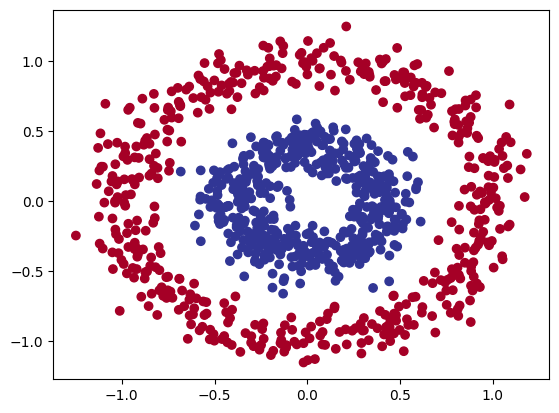

In [99]:
#visulalise with a plot

plt.scatter(x[: , 0] , x[: , 1] , c = y , cmap = plt.cm.RdYlBu)

In [15]:
#input and putput shapes

x.shape  , y.shape

((1000, 2), (1000,))

In [10]:
# view the first example of data

x[0] , y[0]

(array([-0.12457009, -0.78591392]), 1)

In [16]:
# making model

tf.random.set_seed(43)

model = tf.keras.Sequential([
    #tf.keras.layers.Input(1000,2),
    tf.keras.layers.Dense(1)
])

model.compile( loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

model.fit(x , y , epochs = 5)



Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.5376 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.5819 - accuracy: 0.4660
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.3589 - accuracy: 0.4780
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7690 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.4950


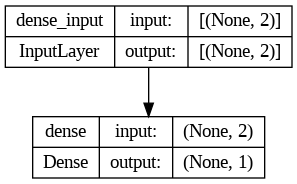

In [12]:
tf.keras.utils.plot_model(model , show_shapes = True)

In [17]:
# lets improve

model.fit(x , y , epochs = 200 , verbose = 0)
model.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936728954315186, 0.5]

In [49]:
x.shape , y.shape

((1000, 2), (1000,))

In [50]:
tf.random.set_seed(43)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_2.fit(x , y , epochs = 200 , verbose = 0)

model_2.evaluate(x , y)


32/32 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000


[0.6976692080497742, 0.5]

In [19]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [52]:
# improve the model

tf.random.set_seed(43)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , input_shape = (2,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(x , y , epochs = 200 , verbose = 0)

model_3.evaluate(x , y)



32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4950


[0.6941958665847778, 0.4950000047683716]

In [ ]:
model_3.predict(x)

In [22]:
# making plotting function

# create a ameshgridd of the different x values
# make prediction across the meshgrid
#plot the prediction as well as  a line between zones

def plot_decision_boundary(model , x , y):
  """plot decision boundary created by a model predicting on x"""
  x_min , x_max = x[: , 0].min()  - 0.1 , x[: , 0].max() + 0.1
  y_min , y_max = x[:, 1].min()  - 0.1 , x[:,1].max() + 0.1

  xx , yy = np.meshgrid(np.linspace(x_min , x_max,100),
                        np.linspace(y_min , y_max , 100))


# create x values

  x_in = np.c_[xx.ravel() , yy.ravel()]

  # make prediction
  y_pred = model.predict(x_in)

  #check for multi class

  if len(y_pred[0]) > 1:
    print("doing multu class")
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)

  else:

    print("doing bonary classification ")
    y_pred = np.round(y_pred).reshape(xx.shape)
    print(y_pred , "\n" , "the shape is ",y_pred.shape)
  # plot the decison boundary
    plt.contourf(xx, yy , y_pred , cmap = plt.cm.RdYlBu , alpha = 0.7)
    plt.scatter(x[ :, 0] , x[:,1] , c = y , s = 40 , cmap =plt.cm.RdYlBu  )
    plt.xlim(xx.min() , xx.max())
    plt.ylim(yy.min() , yy.max())





In [19]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
y

313/313 [==============================] - 1s 2ms/step
doing bonary classification 
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)


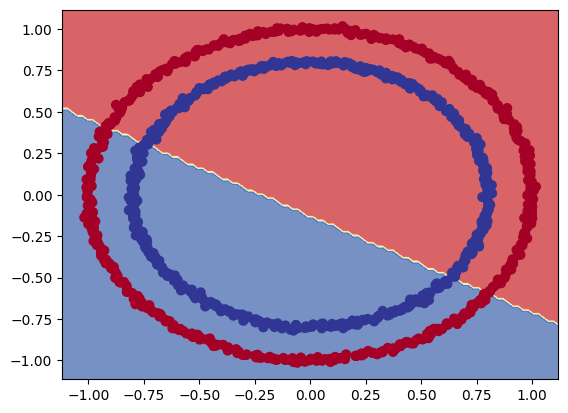

In [53]:
# check out predictions of our model

plot_decision_boundary( model_3 , x , y)

In [35]:
# lets see if we can use it for regresssion data

tf.random.set_seed(43)

X_regression = tf.range(0,1000,5)
Y_regression = tf.range(100,1100,5)

X_regression , Y_regression

# split our data

x_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]

y_reg_train = Y_regression[:150]
y_reg_test = Y_regression[150:]


x_reg_train.shape , y_reg_train.shape , x_reg_test.shape , y_reg_test.shape

(TensorShape([150]), TensorShape([150]), TensorShape([50]), TensorShape([50]))

In [57]:
# improve the model

tf.random.set_seed(43)

model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , input_shape = (1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3_reg.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])


# fit our model

model_3_reg.fit(x_reg_train , y_reg_train , epochs = 100 , verbose =0)

model_3_reg.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 100)               200       
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [58]:
#model eveluate

model_3_reg.evaluate(x_reg_test , y_reg_test)

2/2 [==============================] - 0s 9ms/step - loss: 61.3882 - mae: 61.3882


[61.388153076171875, 61.388153076171875]

2/2 [==============================] - 0s 6ms/step


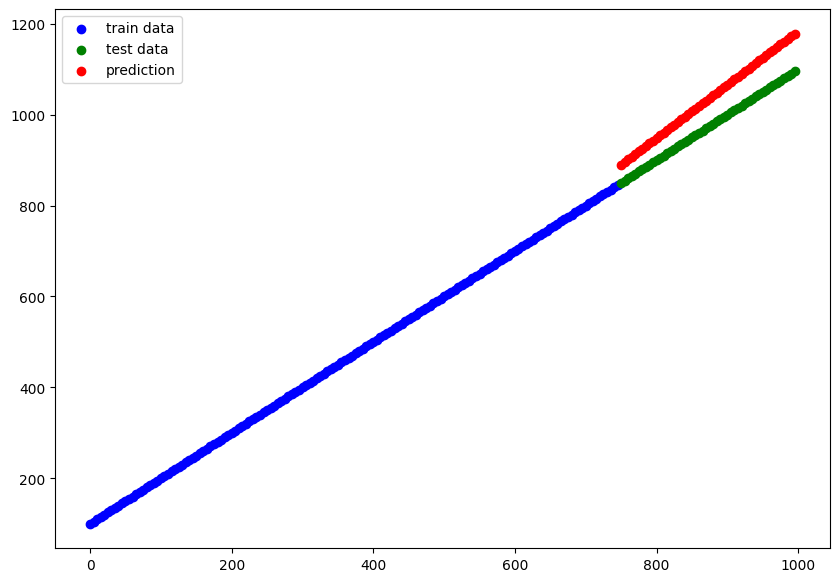

In [59]:
# make prediction with our train model

y_reg_pred = model_3_reg.predict(x_reg_test)

plt.figure(figsize = (10,7))
plt.scatter(x_reg_train , y_reg_train , c = 'b' , label = "train data")
plt.scatter(x_reg_test , y_reg_test , c = 'g' , label = "test data")
plt.scatter(x_reg_test , y_reg_pred , c = 'r' , label = "prediction" )
plt.legend()

In [ ]:
## the missing piece is NON linearity

In [ ]:
tf.random.set_seed(43)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.linear),

])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = 'Adam',
                metrics = ['accuracy'])


history = model_4.fit(x,y , epochs = 100)

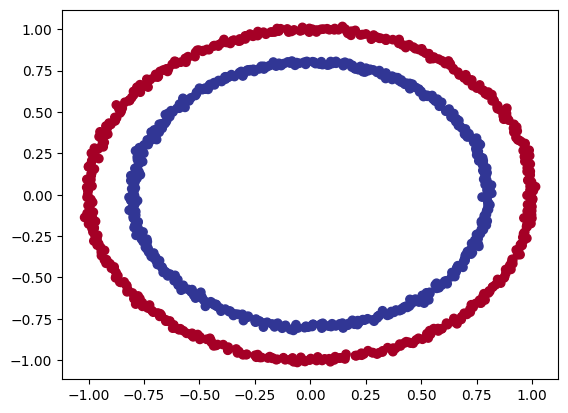

In [61]:
# check our data

plt.scatter(x[: , 0] , x[ : ,1] , c = y , cmap = plt.cm.RdYlBu)


313/313 [==============================] - 0s 1ms/step
doing bonary classification 
[[-0. -0. -0. ...  1.  1.  1.]
 [-0. -0. -0. ...  1.  1.  1.]
 [-0. -0. -0. ...  1.  1.  1.]
 ...
 [-1. -1. -1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]
 [-1. -1. -1. ...  1.  1.  1.]] 
 the shape is  (100, 100)


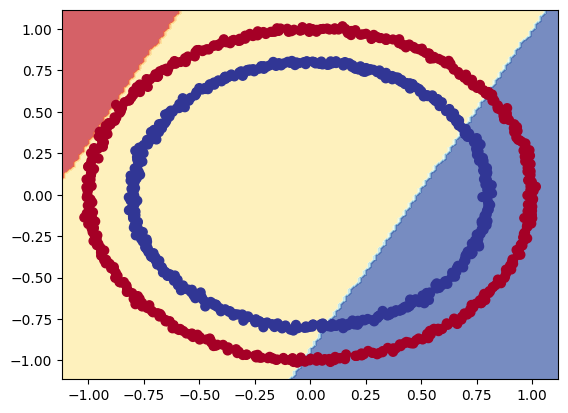

In [65]:
# check our  prediction

plot_decision_boundary(model = model_4 , x = x , y = y)

## Building our model woth non linear activation function

In [ ]:
tf.random.set_seed(43)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , activation = 'relu')
])


model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

history = model_5.fit(x , y , epochs = 100 , verbose=1)

In [ ]:

plot_decision_boundary(model = model_5 , x = x , y = y)

313/313 [==============================] - 1s 2ms/step
doing bonary classification 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 the shape is  (100, 100)


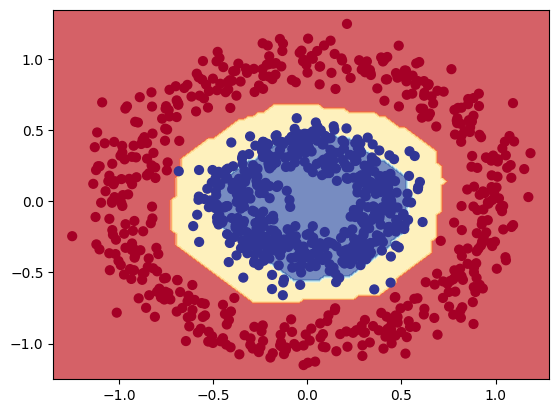

In [101]:
tf.random.set_seed(43)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.relu)
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

history = model_6.fit(x ,  y , epochs = 200 , verbose = 0)

plot_decision_boundary(model = model_6 , x = x , y = y)

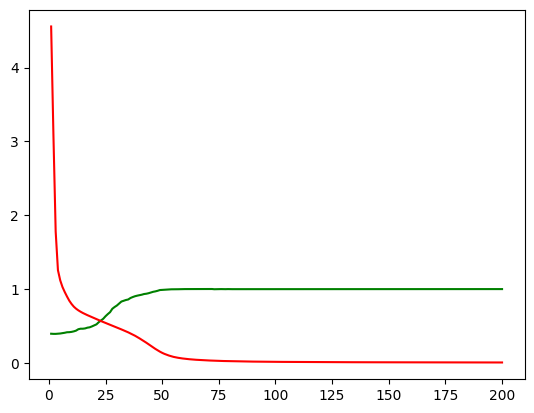

In [114]:
history.history.keys()
epochs = np.arange(1 , len(history.history['accuracy'])+1 ,1)
plt.plot(epochs,history.history['accuracy']  , c = "g")
plt.plot(epochs,history.history['loss']  , c = "r")

